In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
plt.rcParams.update({'font.size': 20})

# Intergation
## Trapezoidal rule

In [3]:
def f(x):
    return x**4 -2*x+1
def trapezoidal(N,a,b):
    h,k=(b-a)/N,np.arange(1,N,1)
    return h*(0.5*f(a)+0.5*f(b)+np.sum(f(a+k*h)))
trapezoidal(N=10,a=0,b=2)

4.50656

In [4]:
## Cell to check how odd and even distribution of k-points works
# N=10
# a=0
# b=2
# h,k=(b-a)/N,np.arange(1,N,1)
# k_even,k_odd=k[0::2],k[1::2]  
# k_even,k_odd

## Simpson's rule

In [5]:
def Simpson(N,a,b):
    h,k=(b-a)/N,np.arange(1,N,1)
    k_odd,k_even=k[0::2],k[1::2]
    return h/3*(f(a)+f(b)+4*np.sum(f(a+k_odd*h))+2*np.sum(f(a+k_even*h)))

Simpson(N=10,a=0,b=2)

4.400426666666667

## Adaptive Trapezoidal rule

In [6]:
## to achieve a target accuracy epsilon 
def Adaptive_trapezoidal(epsilon,a,b):
    N=2
    h,k=(b-a)/N,np.arange(1,N,1)
    I1=h*(0.5*f(a)+0.5*f(b)+np.sum(f(a+k*h)))
    error=1
    n_steps=0
    while abs(error)>epsilon:
        N*=2
        h,k=(b-a)/N,np.arange(1,N,1)
        I2=0.5*I1+h*(np.sum(f(a+k[0::2]*h)))
        error=1/3*(I2-I1)
        I1=I2
        n_steps+=1
    print('number of iterations =',n_steps,',', 'number of points i.e N =',N)
    return I1
    

In [7]:
def f(x):
    return (np.sin(np.sqrt(100*x)))**2
Adaptive_trapezoidal(epsilon=1e-6,a=0,b=1)

number of iterations = 11 , number of points i.e N = 4096


0.4558320582782708

## Adaptive Simpson's rule

In [8]:
def Adaptive_Simpson(epsilon,a,b):
    N=2
    h,k=(b-a)/N,np.arange(1,N,1)
    S1=1/3*(f(a)+f(b)+2*(np.sum(f(a+k[1::2]*h))))
    T1=2/3*(np.sum(f(a+k[0::2]*h)))
    I1=h*(S1+2*T1)
    error=1
    n_steps=0
    while abs(error)>epsilon:
        N*=2
        h,k=(b-a)/N,np.arange(1,N,1)
        T2=2/3*(np.sum(f(a+k[0::2]*h)))
        S2=S1+T1
        I2=h*(S2+2*T2)
        error=1/15*(I2-I1)
        S1=S2
        T1=T2
        I1=I2
        n_steps+=1
    print('number of iterations =',n_steps,',', 'number of points i.e N =',N)
    return I1

In [9]:
def f(x):
    return (np.sin(np.sqrt(100*x)))**2
Adaptive_Simpson(epsilon=1e-6,a=0,b=1)

number of iterations = 7 , number of points i.e N = 256


0.4558321871467207

## Romberg integration

In [10]:
np.set_printoptions(threshold=np.inf)
def f(x):
    return (np.sin(np.sqrt(100*x)))**2
### Code taken from H.W Solutions coded by Prof. Strubbe
m_max = 10
a=0
b=1
R = np.zeros([m_max,m_max])
Rom=np.around(R, decimals=8)
err = np.zeros([m_max,m_max-1])

for i in range(1,m_max):
    N = 2**(i-1)
    Rom[i,1]=trapezoidal(N,a,b)
    for m in range(1,i):
        err[i,m] = (Rom[i,m] - Rom[i-1,m])/(4**m - 1)
        Rom[i,m+1] = Rom[i,m] + err[i,m]
print('Romberg table :\n' ,Rom[1:,1:])
print('Error for Romberg index = 6 :' ,err[7])

Romberg table :
 [[0.14797948 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.32523191 0.38431605 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.51228285 0.57463317 0.58732097 0.         0.         0.
  0.         0.         0.        ]
 [0.40299745 0.36656898 0.35269804 0.34897386 0.         0.
  0.         0.         0.        ]
 [0.43010337 0.43913868 0.44397666 0.44542552 0.44580376 0.
  0.         0.         0.        ]
 [0.44841467 0.45451843 0.45554375 0.45572735 0.45576775 0.45577749
  0.         0.         0.        ]
 [0.45391293 0.45574569 0.4558275  0.45583201 0.45583242 0.45583248
  0.45583249 0.         0.        ]
 [0.4553485  0.45582703 0.45583245 0.45583253 0.45583253 0.45583253
  0.45583253 0.45583253 0.        ]
 [0.45571127 0.45583219 0.45583253 0.45583253 0.45583253 0.45583253
  0.45583253 0.45583253 0.45583253]]
Error for Romberg index = 6 : [0.00000000e+00 1.83275514e-03 8.18170049e-05 4.50404880

## Adaptive Romberg

In [11]:
## Adaptive Romberg is convinient to do with list operations 
def Romberg(epsilon,a,b):
    err=1
    N=1
    Romberg_index=1
    R_11=[]
    R_21=[]
    I_1=trapezoidal(N,a,b)
    R_11.append(I_1)
    print('m is Romberg index')
    print('m= ',Romberg_index,':',R_11)
    iterations=0
    while abs(err)>epsilon:
        R_21=[]
        N*=2
        h,k=(b-a)/N,np.arange(1,N,1)
        I_2=0.5*I_1+h*(np.sum(f(a+k[0::2]*h)))#this will be my R_21; using adptive trapezoidal rule
###--------------------------------------------     
###--------------------------------------------  
###I got error "division by zero" using 4**m, so I changed it to 4**(m+1)
        R_21.append(I_2)                            #Saving R_21 
        for m in range(Romberg_index):
            err=(1/(4**(m+1)-1))*(R_21[m]-R_11[m]) ###----------------error.  eq(5.49), Newman
            R_2=R_21[m]+err                      ###----------------eq(5.51), Newman
            R_21.append(R_2)
        Romberg_index+=1
        R_11=R_21
        I_1=I_2
        iterations+=1
        print('iteration # =',iterations)
        print('number of points N =',N)
        print('m= ',Romberg_index,':',R_21)
        print('error=',err)

In [12]:
def f(x):
    return (np.sin(np.sqrt(100*x)))**2
Romberg(epsilon=10e-10,a=0,b=1)

m is Romberg index
m=  1 : [0.14797948454665205]
iteration # = 1
number of points N = 2
m=  2 : [0.3252319078064746, 0.38431604889308213]
error= 0.05908414108660751
iteration # = 2
number of points N = 4
m=  3 : [0.5122828507233315, 0.5746331650289505, 0.5873209727713417]
error= 0.012687807742391222
iteration # = 3
number of points N = 8
m=  4 : [0.4029974484782483, 0.3665689810632206, 0.35269803546550527, 0.34897386185747614]
error= -0.0037241736080291486
iteration # = 4
number of points N = 16
m=  5 : [0.430103369294747, 0.43913867623357994, 0.4439766559116039, 0.44542552290281184, 0.4458037647108328]
error= 0.00037824180802092434
iteration # = 5
number of points N = 32
m=  6 : [0.44841466578746997, 0.45451843128504427, 0.4555437482884752, 0.45572735292937794, 0.45576775226281546, 0.455777492231097]
error= 9.739968281508006e-06
iteration # = 6
number of points N = 64
m=  7 : [0.4539129312153759, 0.4557456863580112, 0.4558275033628757, 0.4558320074116757, 0.45583241782141015, 0.455832

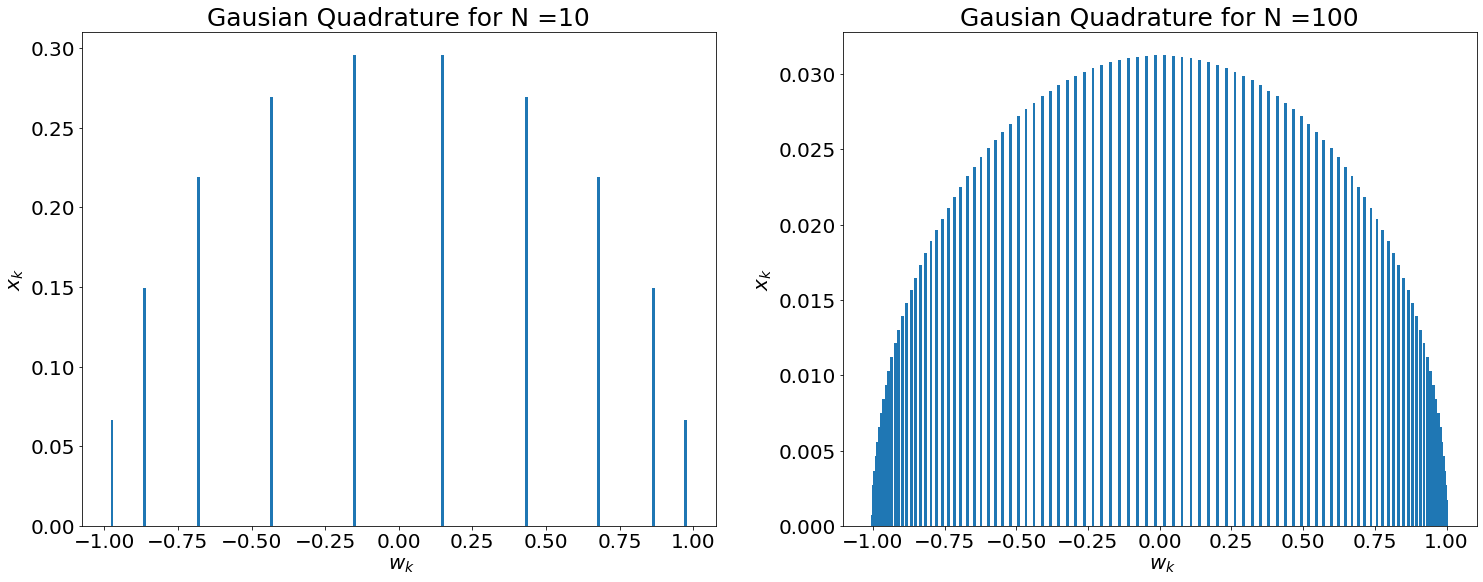

In [13]:
from gaussxw import gaussxw 
fig = plt.figure(figsize=(25,20))
N=[10,100]
for n in range(len(N)) :
    plt.subplot(2,2,n+1)
    x,w=gaussxw(N[n])
    plt.xlabel(" $w_k$")
    plt.ylabel('$x_k$')
    plt.title('Gausian Quadrature for N ='+str(N[n]), fontsize=25)
    plt.bar(x,w,width=0.01)
plt.show()

# xx=0.5*(b-a)*x+0.5*(b+a)     ## Integration points for the limits of integration a,b
# ww=0.5*(b-a)*w               ##wieghts w mapped with integration limit

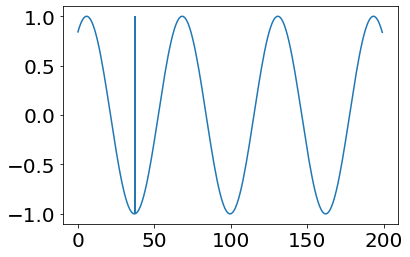

In [14]:
y_axis = np.sin(np.linspace(1, 21, 200))
plt.plot(y_axis)
plt.vlines(x=[37, 37.25, 37.5], ymin=min(y_axis), ymax=max(y_axis))
plt.show()

In [15]:
### See the beauty of gaussian quadrature now:
## Calculating integral
def I_1(x):
    return x**4 -2*x+1
def I_2(x):
    return (np.sin(np.sqrt(100*x)))**2
x,w=gaussxw(N=3)
a=0
b=2
xx,ww=0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
I_1=np.sum(ww*I_1(xx))
print(I_1)


4.4000000000000075


In [16]:
##Now calculating I_2
x,w=gaussxw(N=10)
a=0
b=1
xx,ww=0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
I_2=np.sum(ww*I_2(xx))
print(I_2)


0.4558325330654303
